In [142]:
import numpy as np
import pandas as pd
from linearmodels import PanelOLS
import statsmodels.api as sm
from scipy import stats

In [143]:
df_data = pd.read_csv('InitialRegressionData.csv').drop('Unnamed: 0', axis=1)

In [144]:
#drop where donations = 0
df_data = df_data[df_data['total_donations_NO_GG'] > 0]
#add logs ????????????????
df_data['L_total_donations_NO_GG'] = np.log(df_data['total_donations_NO_GG'])

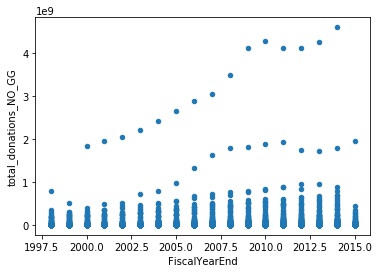

In [138]:
plt = df_data.plot.scatter(x='FiscalYearEnd', y='total_donations_NO_GG')

In [145]:
# _NO removes outliers outside of 3 std of mean
df_data_NO = df_data[(np.abs(df_data['total_donations_NO_GG'] - df_data['total_donations_NO_GG'].mean()) <= 
                                                                    (3*df_data['total_donations_NO_GG'].std()))]
#~300 rows removed with outliers

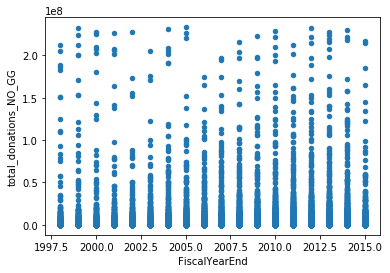

In [140]:
plt = df_data_NO.plot.scatter(x='FiscalYearEnd', y='total_donations_NO_GG')

In [146]:
df_data_NO = df_data_NO.set_index(['EIN', 'FiscalYearEnd']).sort_index()

In [151]:
y = df_data_NO.total_donations_NO_GG #NOT INCLUDEING RAISED or GOV GRANNTs BELOW
x = df_data_NO[['fundraising','PostTreatment*PCG_Treatment', 'government_grants']]
mod = PanelOLS(y, x, time_effects = True, entity_effects = True) #cant use firm FE - perf collinear to TREATMENT
res = mod.fit(cov_type='clustered', cluster_entity=True)  #clustering by EIN???? correct?
print(res)

                            PanelOLS Estimation Summary                            
Dep. Variable:     total_donations_NO_GG   R-squared:                        0.0008
Estimator:                      PanelOLS   R-squared (Between):             -0.0003
No. Observations:                  42757   R-squared (Within):           -1.386e-05
Date:                   Tue, Apr 16 2019   R-squared (Overall):             -0.0001
Time:                           14:17:13   Log-likelihood                -7.132e+05
Cov. Estimator:                Clustered                                           
                                           F-statistic:                      9.9066
Entities:                           6658   P-value                           0.0000
Avg Obs:                          6.4219   Distribution:                 F(3,36079)
Min Obs:                          1.0000                                           
Max Obs:                          18.000   F-statistic (robust):            

In [152]:
#now tryint logs
y = df_data_NO.L_total_donations_NO_GG #NOT INCLUDEING RAISED or GOV GRANNTs BELOW
x = df_data_NO[['fundraising','PostTreatment*PCG_Treatment', 'government_grants']]
mod = PanelOLS(y, x, time_effects = True, entity_effects = True) #cant use firm FE - perf collinear to TREATMENT
res = mod.fit(cov_type='clustered', cluster_entity=True)  #clustering by EIN???? correct?
print(res)

                             PanelOLS Estimation Summary                             
Dep. Variable:     L_total_donations_NO_GG   R-squared:                        0.0049
Estimator:                        PanelOLS   R-squared (Between):             -0.0012
No. Observations:                    42757   R-squared (Within):               0.0060
Date:                     Tue, Apr 16 2019   R-squared (Overall):             -0.0008
Time:                             14:17:40   Log-likelihood                -5.053e+04
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      58.989
Entities:                             6658   P-value                           0.0000
Avg Obs:                            6.4219   Distribution:                 F(3,36079)
Min Obs:                            1.0000                                           
Max Obs:                            18.000   F-statist